# 1. **Business Problem**

* The Client

    XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

* Project Objective:

    To generate insights to help XYZ identify the right company to make their investment.

* In next sections we will analyze data in the following process:

    * Data Intake and Preliminary Processing
    * Compare Yellow Cab and Pink Cab from different aspects
    * Investment Recommendation

# 2. Data Intake and Preliminary Processing
First of all, we import all the packages that are required in this porject. 


In [1]:
# First of all, we import all the packages that are required in this porject. 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

In [2]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_Data = pd.read_csv('Customer_ID.csv')
Transaction_Data = pd.read_csv('Transaction_ID.csv')
City_Data = pd.read_csv('City.csv')
Holiday_Data = pd.read_csv('USHoliday.csv')


In [3]:
Cab_Data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [4]:
Customer_Data.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [5]:
Transaction_Data.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [6]:
City_Data.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [7]:
Holiday_Data.head(10)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
5,2009-07-04,4th of July,Saturday,7,4,2009
6,2010-07-04,4th of July,Sunday,7,4,2010
7,2011-07-04,4th of July,Monday,7,4,2011
8,2012-07-04,4th of July,Wednesday,7,4,2012
9,2013-07-04,4th of July,Thursday,7,4,2013


In [8]:
Cab_Data.info()
Customer_Data.info()
Transaction_Data.info()
City_Data.info()
Holiday_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [9]:
print(Cab_Data.describe())
print(Customer_Data.describe())
print(Transaction_Data.describe())
print(City_Data.describe())
print(Holiday_Data.describe())

       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        1501

There are 0 missing values in all 5 data sets. 

Next, we are going to merge data, change data type and create some interested features. 

In [10]:
# Prepare Holiday_Data for merging
Holiday_Data['Date'] = pd.to_datetime(Holiday_Data['Date'])
Holiday = [1]*Holiday_Data.shape[0]
Holiday_Data['Holiday'] = Holiday
Holiday_Data = Holiday_Data[['Date','Holiday']]
Holiday_Data.drop_duplicates()
Holiday_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.5 KB


In [11]:
# Prepare Cab_data for merging
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])
Cab_Data = Cab_Data.rename(columns = {'Date of Travel': 'Date'})
Cab_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date            359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [12]:
Cab_Data

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,1970-01-01 00:00:00.000043108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,1970-01-01 00:00:00.000043104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [13]:
# Merged all data into one data set for convenience.
Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID').merge(City_Data, on = 'City').merge(Holiday_Data, how="left",on = 'Date')
Merged_Data['Holiday'] = Merged_Data['Holiday'].fillna(0)
missing_value = 0
for column in Merged_Data.columns :
    missing_value += Merged_Data[column].isna().sum() + Merged_Data[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(Merged_Data.shape[0] ,Merged_Data.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(Merged_Data.dtypes))


Merged dataset has 359392 entries , 15 features and 0 missing values

Feature's datatypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object


In [14]:
# Exporting the DataFrame.
Merged_Data.to_csv("Merged_Data.csv")

In [15]:
# data cleaning
for column in Merged_Data.columns:
    if ' ' in column:
        Merged_Data = Merged_Data.rename(columns={column:column.replace(' ','_')})
for column in ["Population","Users"] :
    Merged_Data[column] = Merged_Data[column].str.replace(',','')
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    Merged_Data[column] = Merged_Data[column].astype('category')
for column in ["Population", "Users","Holiday"] :
    Merged_Data[column] = Merged_Data[column].astype('int64')
# Merged_Data['Holiday'] = Merged_Data['Holiday'].astype('bool')
Merged_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date                359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [16]:
# Derive some interested features for later analysis
Merged_Data['Year'] = Merged_Data['Date'].dt.year
Merged_Data['Month'] = Merged_Data['Date'].dt.month
Merged_Data['Profit'] = Merged_Data['Price_Charged'] - Merged_Data['Cost_of_Trip']
Merged_Data['Profit_Rate'] = ((Merged_Data['Price_Charged'] - Merged_Data['Cost_of_Trip'])/Merged_Data['Cost_of_Trip'])*100
Merged_Data['Profit_per_KM'] = Merged_Data['Profit']/ Merged_Data['KM_Travelled']
Merged_Data['User_Ratio'] = Merged_Data['Users']/Merged_Data['Population']*100
Merged_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date                359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [17]:
print(Merged_Data.head())

   Transaction_ID                          Date     Company        City  \
0        10000011 1970-01-01 00:00:00.000042377    Pink Cab  ATLANTA GA   
1        10351127 1970-01-01 00:00:00.000043302  Yellow Cab  ATLANTA GA   
2        10412921 1970-01-01 00:00:00.000043427  Yellow Cab  ATLANTA GA   
3        10000012 1970-01-01 00:00:00.000042375    Pink Cab  ATLANTA GA   
4        10320494 1970-01-01 00:00:00.000043211  Yellow Cab  ATLANTA GA   

   KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode Gender  \
0         30.45         370.95      313.6350        29290         Card   Male   
1         26.19         598.70      317.4228        29290         Cash   Male   
2         42.55         792.05      597.4020        29290         Card   Male   
3         28.62         358.52      334.8540        27703         Card   Male   
4         36.38         721.10      467.1192        27703         Card   Male   

   ...  Income_(USD/Month)  Population  Users  Holiday  Year  

# 3. Compare Yellow Cab and Pink Cab from Different Aspects

In this section , we compare the data of Yellow Cab and Pink Cab to answer the following questions.

**3.1 What's the profit rate of Cab market? Which company has higher profit rate?**

**3.2 Does Yellow Cab have bigger market share than Pink Cab?**

**3.3 Do Customers prefer Yellow Cab to Pink Cab?**

**3.4 Who serves the higher income**

**3.5 Which company prevail in which city?**

**3.6 Can Yellow Cab make more profit in the future?**
 
As some figures and tables have implications for different questions, we will analyze step-by-step and then make a summary answer at last. 

<AxesSubplot:xlabel='Profit_per_KM', ylabel='Count'>

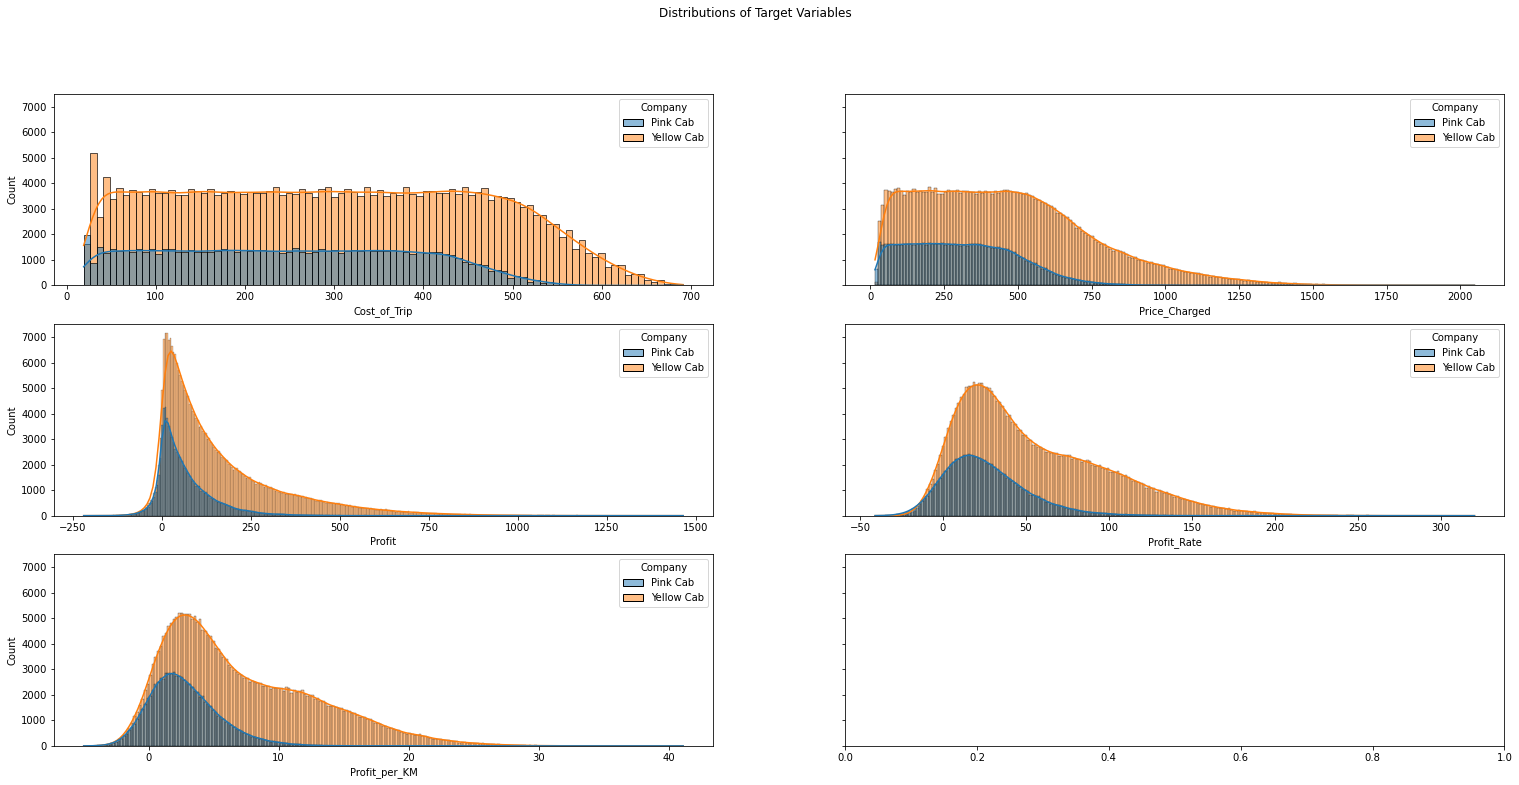

In [18]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=Merged_Data , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=Merged_Data , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=Merged_Data , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=Merged_Data , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=Merged_Data , x='Profit_per_KM' , kde = True , hue="Company")

We can see from the last three figures that distributions of profits are all right skewed. But Yellow Cab has a visible bump to the right of peak in the distribution of Profit Rate and Profit per KM, which will probably lead to higher total profit rate. So we will check company's profit rate next. 

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
Year                                      
1970     25.247837   53.792598   47.958749


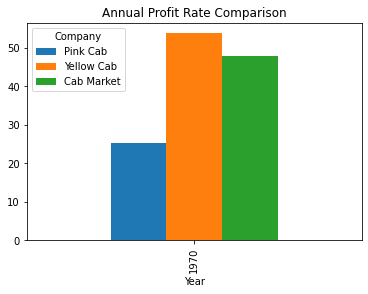

In [19]:
Annual_Profit_Rate = Merged_Data.groupby(['Year','Company']).Profit.sum().unstack()/Merged_Data.groupby(['Year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = Merged_Data.groupby(['Year']).Profit.sum()/Merged_Data.groupby(['Year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

From the last figure and table, we can see that Yellow Cab does have higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year. And one of the reasons is Yellow Cab have more high-profit-rate rides proportionally than Pink Cab. From this point of view, we think Yellow Cab is more efficient, but we still need to mine deeper into the data for an overall investment recommendation. 

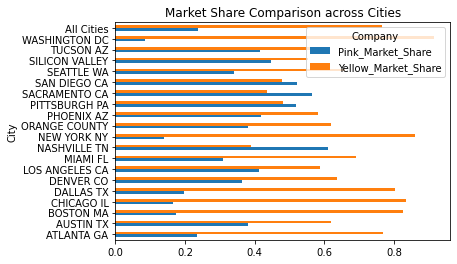

In [20]:
# Assume Pink and Yellow Cap are the only cab companies in USA. 
# Check market share of both cab companies at national and city level. 
Company_Transaction = Merged_Data.groupby(['City','Company']).Transaction_ID.count().unstack()
Company_Transaction.loc['All Cities'] = Company_Transaction.sum(numeric_only=True)
Company_Transaction['City_Market'] = Company_Transaction['Pink Cab'] + Company_Transaction['Yellow Cab']
Company_Transaction['Pink_Market_Share'] = Company_Transaction['Pink Cab']/Company_Transaction['City_Market']
Company_Transaction['Yellow_Market_Share'] = Company_Transaction['Yellow Cab']/Company_Transaction['City_Market']
ax = Company_Transaction.iloc[:,3:5].plot(kind='barh',stacked = False, title = 'Market Share Comparison across Cities')
plt.show()

Assume Pink and Yellow Cap are the only cab companies in USA. Yellow Cap's market share is three times greater than that of Pink Cap nationally. And Yellow Cap's advantage exists in most cities. As market share is highly related to the number of cabs owned by each company, this can be seen a stable advantage of Yellow Cab.

In [21]:
from sklearn.preprocessing import LabelEncoder
Data = Merged_Data.drop(['Transaction_ID', 'Customer_ID'], axis=1)
le = LabelEncoder()
Data["Gender"] = le.fit_transform(Data["Gender"])
Data["City"] = le.fit_transform(Data["City"])
Data["Payment_Mode"] = le.fit_transform(Data["Payment_Mode"])
Pink_Data = Data[Data['Company'] == 'Pink Cab'] 
Yellow_Data = Data[Data['Company'] == 'Yellow Cab']
Data["Company"] = le.fit_transform(Data["Company"])
Data

,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Holiday,Year,Month,Profit,Profit_Rate,Profit_per_KM,User_Ratio
0,1970-01-01 00:00:00.000042377,0,0,30.45,370.95,313.6350,0,1,28,10813,814885,24701,0,1970,1,57.3150,18.274427,1.882266,3.031225
1,1970-01-01 00:00:00.000043302,1,0,26.19,598.70,317.4228,1,1,28,10813,814885,24701,0,1970,1,281.2772,88.612790,10.739870,3.031225
2,1970-01-01 00:00:00.000043427,1,0,42.55,792.05,597.4020,0,1,28,10813,814885,24701,0,1970,1,194.6480,32.582415,4.574571,3.031225
3,1970-01-01 00:00:00.000042375,0,0,28.62,358.52,334.8540,0,1,27,9237,814885,24701,0,1970,1,23.6660,7.067558,0.826904,3.031225
4,1970-01-01 00:00:00.000043211,1,0,36.38,721.10,467.1192,0,1,27,9237,814885,24701,0,1970,1,253.9808,54.371732,6.981330,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,1970-01-01 00:00:00.000043162,1,18,38.40,668.93,525.3120,1,0,29,6829,418859,127001,0,1970,1,143.6180,27.339562,3.740052,30.320705
359388,1970-01-01 00:00:00.000043203,1,18,3.57,67.60,44.5536,1,0,29,6829,418859,127001,0,1970,1,23.0464,51.727358,6.455574,30.320705
359389,1970-01-01 00:00:00.000043287,1,18,23.46,331.97,337.8240,0,0,29,6829,418859,127001,0,1970,1,-5.8540,-1.732855,-0.249531,30.320705
359390,1970-01-01 00:00:00.000043314,1,18,27.60,358.23,364.3200,1,0,29,6829,418859,127001,0,1970,1,-6.0900,-1.671607,-0.220652,30.320705


Text(0, 0.5, 'Yellow Cab')

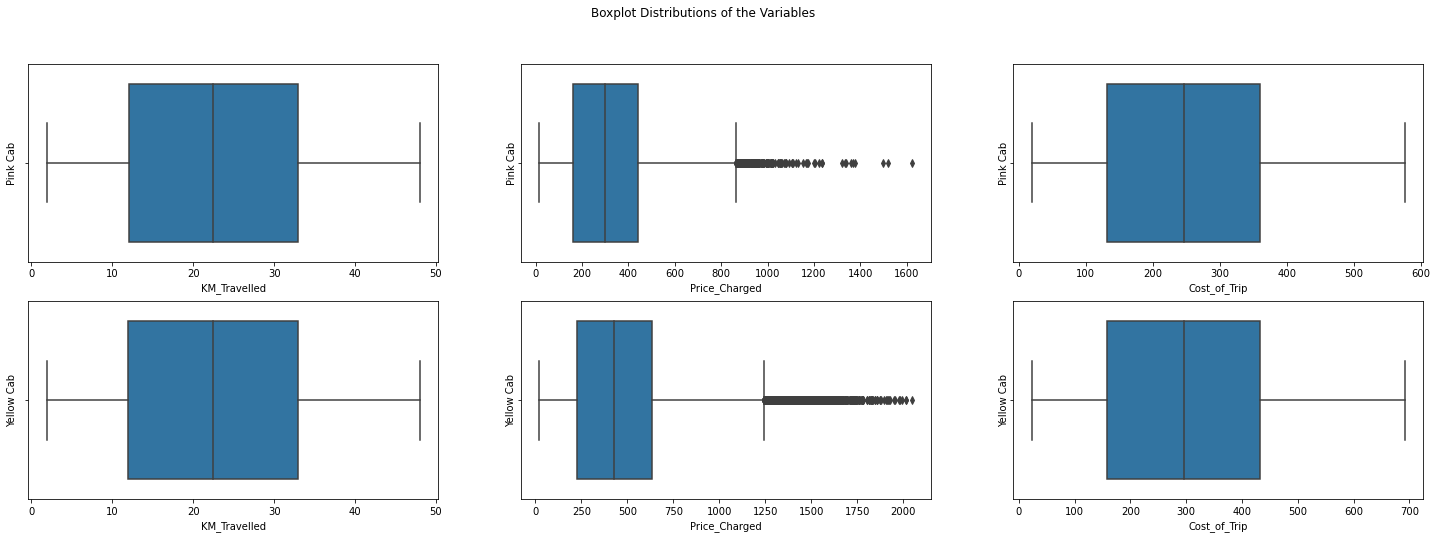

In [22]:
# Check out more distributions of variables using Boxplot
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")

The distributions of KM_Traveled and Cost_of_Trip are similar for both companies. But Yellow Cab have greater medium in Price_Charged and higher proportion of rides with higher prices. 

Text(0, 0.5, 'Yellow Cab')

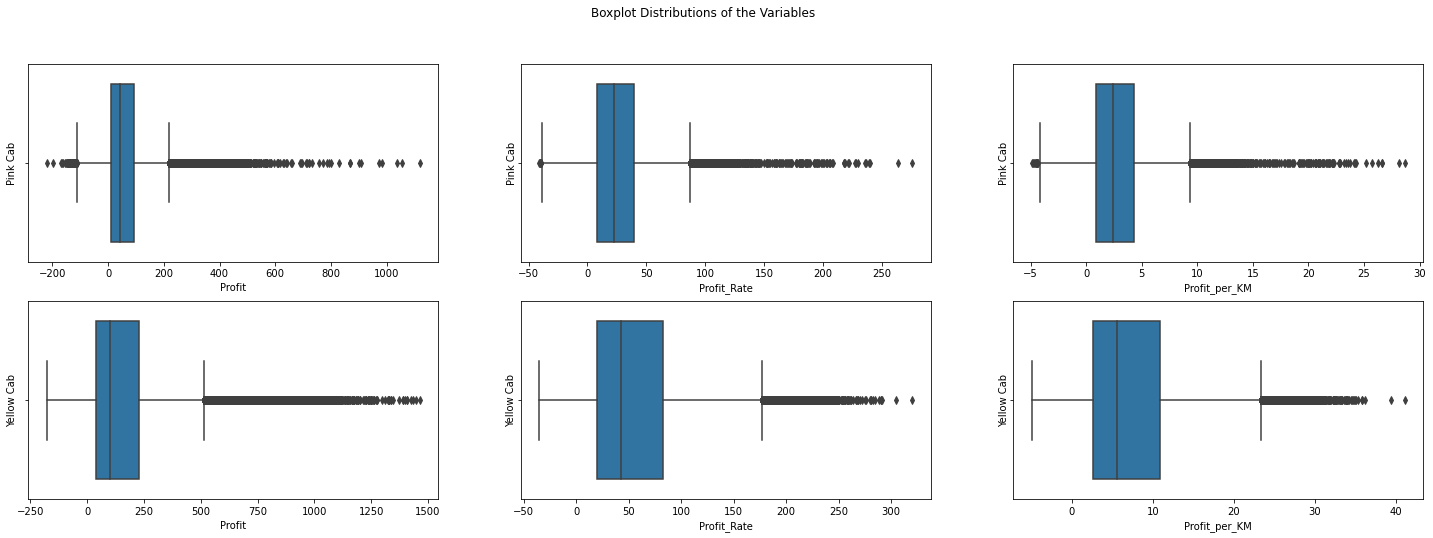

In [23]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Profit' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Profit_Rate' ,  data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Profit_per_KM' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Profit' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Profit_Rate' ,  data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Profit_per_KM' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

Though Yellow Cab has lower Profit medium, it has more high-profit rides proportionally. What's more, Yellow Cab's Profit_Rate and Profit_per_KM also outperforms Pink Cab in terms of medium and high-profit-ride ratio. This also gives us a hint of pricing strategy of Yellow Cab: lower start rate but higher average rate per KM. 

Text(0, 0.5, 'Yellow Cab')

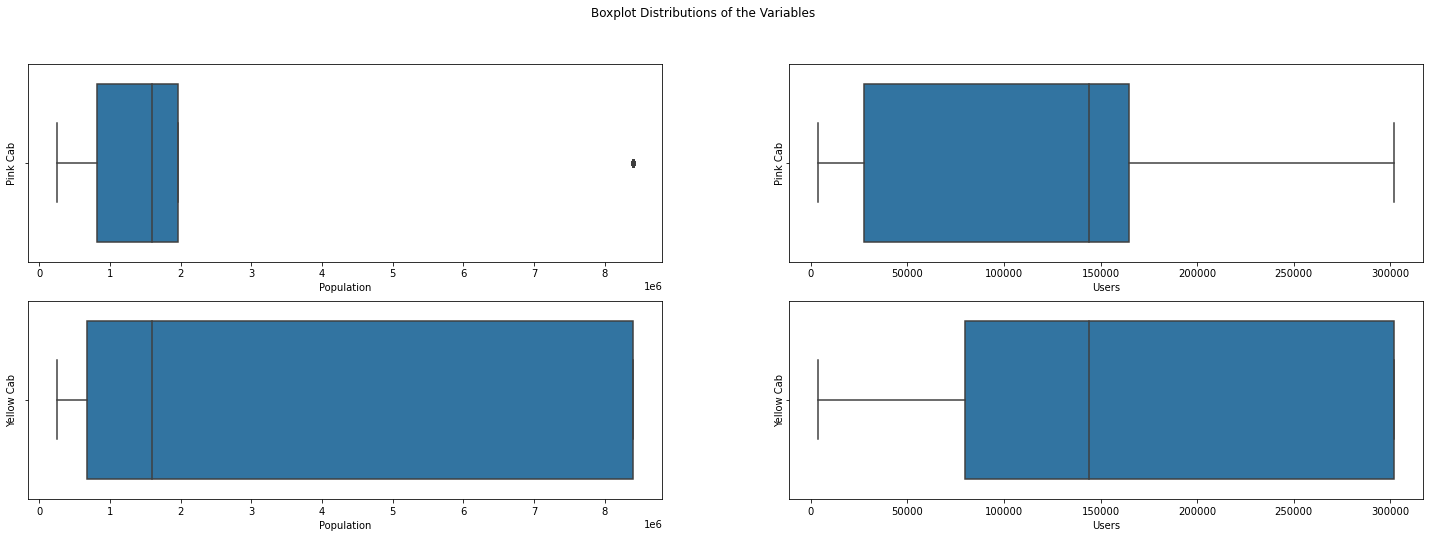

In [24]:
fig,axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Population' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Users' ,  data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Population' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Users' ,  data=Yellow_Data  ) .set_ylabel("Yellow Cab")

From the boxplot of 'Population' and 'Users', we found that Pink Cab serves mainly small cities while Yellow Cab has more transactions happened in big cities.

Text(0, 0.5, 'Yellow Cab')

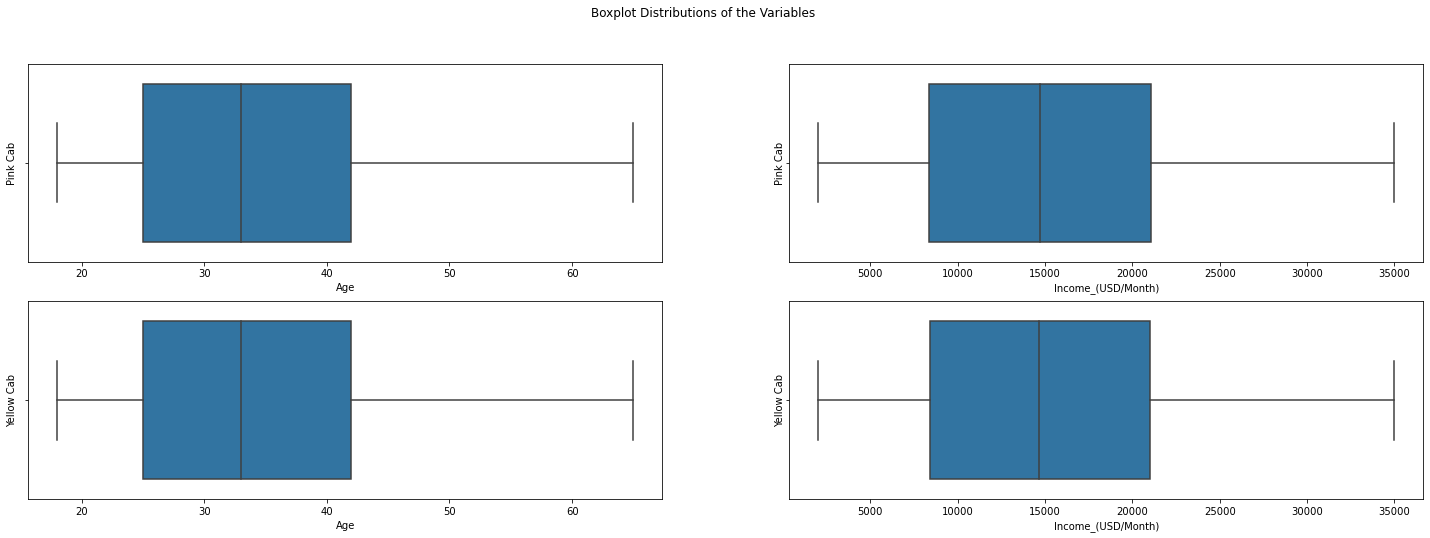

In [25]:
fig,axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

In [26]:
Customer_Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data = Customer_Merged_Data[['Company', 'Customer ID','Gender']]

In [27]:
Customer_Merged_Data = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data = Customer_Merged_Data[['Company', 'Customer ID','Gender']]
Customer_Merged_Data = Customer_Merged_Data.drop_duplicates()
Customer_Gender = Customer_Merged_Data.groupby(['Company', 'Gender']).count().unstack()
Customer_Gender['Female_Rate'] = Customer_Gender.iloc[:,0] / (Customer_Gender.iloc[:,0] + Customer_Gender.iloc[:,1])
print(Customer_Gender)

           Customer ID        Female_Rate
Gender          Female   Male            
Company                                  
Pink Cab         14819  17511    0.458367
Yellow Cab       18394  21502    0.461049


From the boxplot of 'Age' and 'Income_(USD/Month)' and the table of Customer_Gender, customers of Pink Cab and Yellow Cab have similar statistics.

In [28]:
Customer_Merged_Data_2 = Cab_Data.merge(Transaction_Data, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID')
Customer_Merged_Data_2['Year'] = Customer_Merged_Data_2['Date'].dt.year
Customer_Merged_Data_2 = Customer_Merged_Data_2[['Company', 'Customer ID','Year']]
Customer_Merged_Data_2 = Customer_Merged_Data_2.drop_duplicates()
Yellow_Customer_Merged_Data = Customer_Merged_Data_2[Customer_Merged_Data_2['Company'] == "Yellow Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Pink_Customer_Merged_Data = Customer_Merged_Data_2[Customer_Merged_Data_2['Company'] == "Pink Cab"].drop(['Company'], axis = 1).groupby(['Year']).count()
Customer_Loyalty = Customer_Merged_Data_2.groupby(['Customer ID','Year']).count().unstack()
#tmp = Customer_Loyalty[Customer_Loyalty['Company' == "Yellow Cab"]]
print("Customer Number of Yellow Cab")
print(Yellow_Customer_Merged_Data)
print("Customer Number of Pink Cab")
print(Pink_Customer_Merged_Data)
seq = np.arange(0.1,1,0.1)
print(Customer_Loyalty.describe(seq))


Customer Number of Yellow Cab
      Customer ID
Year             
1970        39896
Customer Number of Pink Cab
      Customer ID
Year             
1970        32330
            Company
Year           1970
count  46148.000000
mean       1.565095
std        0.495750
min        1.000000
10%        1.000000
20%        1.000000
30%        1.000000
40%        1.000000
50%        2.000000
60%        2.000000
70%        2.000000
80%        2.000000
90%        2.000000
max        2.000000


Yellow Cap has more customers in all years and 60%-70% customers use only Cap company. 

<AxesSubplot:>

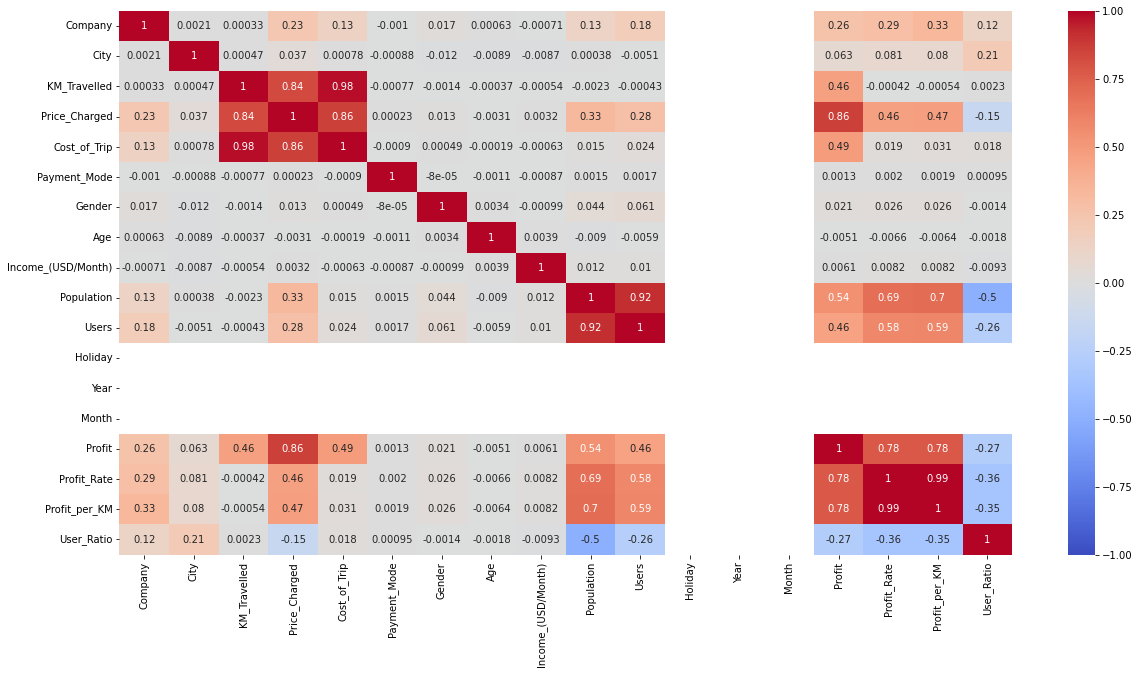

In [29]:
Corr = Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

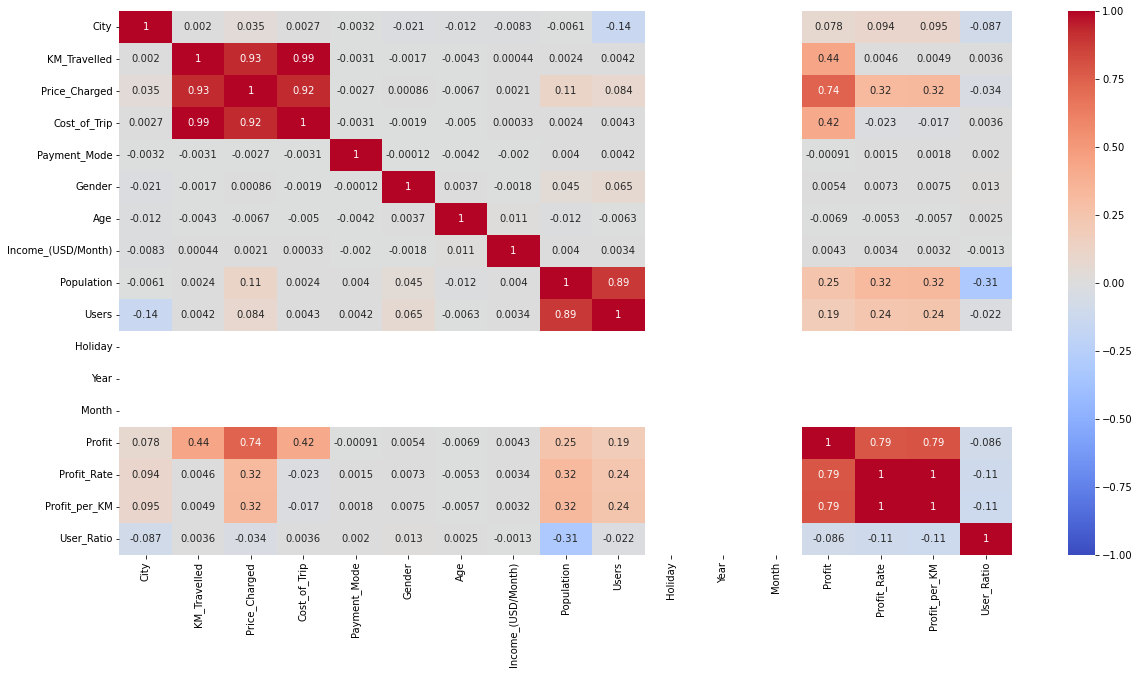

In [30]:
#
Pink_Corr = Pink_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

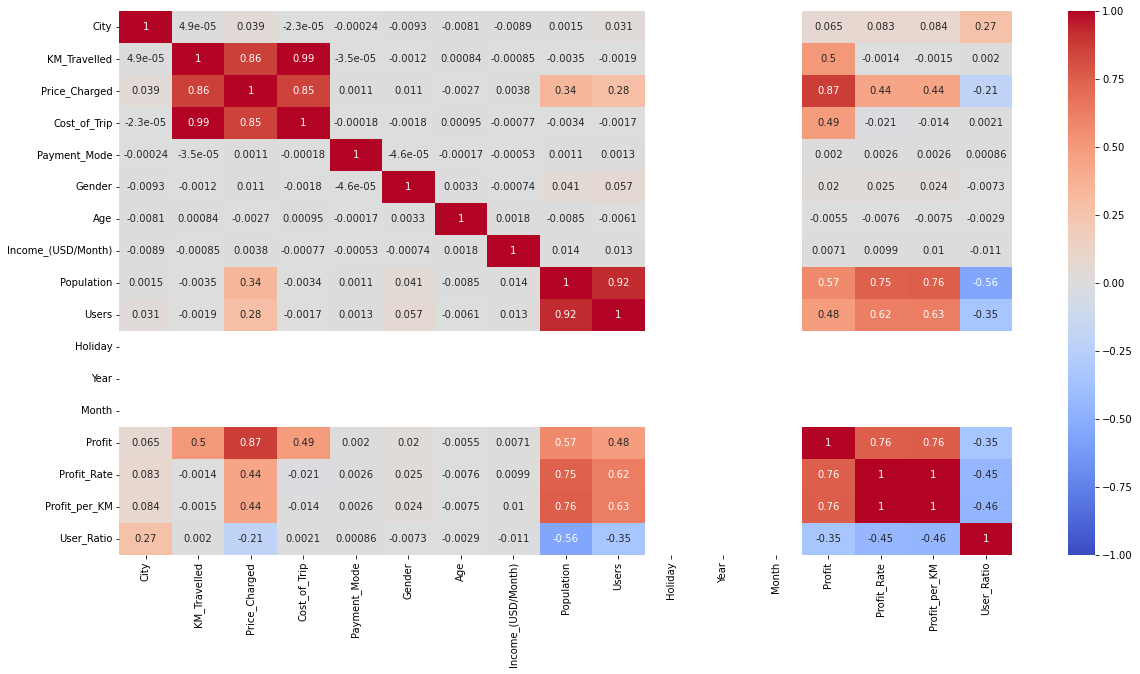

In [31]:
#
Yellow_Corr = Yellow_Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Heatmaps also tell us some intuitive truth: Price_Charged is positively related to profit indexes, i.e., Profit, Profit_Rate, Profit_per_KM. However, we also find that the correlations between Population, Users and profit indexes of Yellow Cab is much higher than those of Pink Cab. This review the pricing power of Yellow Cab in bigger cities. Or we can say that geographical price differentiation is the strategy Yellow Cab uses to increase profit.

Let's review the questions asked at the beginning of this section:

**3.1 What's the profit rate of Cab market? Which company has higher profit rate?**

**Ans: 50% is the profit of Cab Market, and Yellow Cab has higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year.**

**3.2 Does Yellow Cab have bigger market share than Pink Cab?**

**Ans: Yes, Yellow Cab's market share is two times greater than Pink Cab's, though customer number is just 0.5 time greater.**


**3.3 Do Customers prefer Yellow Cab to Pink Cab?**

**Ans: Not very clear from the data.**

**3.4 Who serves the higher income**

**Ans:There isn't very high difference in customer characteristics of both companies.**

**3.5 Which company prevail in which city?**

**Ans:Yellow Cab prevails in most cities except San Diego, Sacramento, Pittsburgh, and Nashville.**

**3.6 Can Yellow Cab make more profit in the future?**

**Ans:There are only three years of data, we are not sure whether Yellow cab can keep up their profit indexes as there is a decreasing in 2018 compared to 2016 and 2017. But Yellow Cab should be able to continue to earn more profit than Pink Cab with dominant market share and better pricing strategy.**

# 4. Investment Recommendation

**According to the analysis in Section 3, we recommend XYZ company to invest in Yellow Cab.**